# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.deep_learning_evaluate import deep_learning_evaluate_
from utils.plot_model_changes import plot_changes
from utils.sentimentiformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate,false_negative_rate, false_positive_rate, performance_metrics_data_frame
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_csv('IMDB Dataset.csv')
Corpus.rename(columns={'review': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].str.capitalize()
Corpus

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,Positive
1,A wonderful little production. <br /><br />The...,Positive
2,I thought this was a wonderful way to spend ti...,Positive
3,Basically there's a family where a little boy ...,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Positive
...,...,...
49995,I thought this movie did a down right good job...,Positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",Negative
49997,I am a Catholic taught in parochial elementary...,Negative
49998,I'm going to have to disagree with the previou...,Negative


In [5]:
Data = pd.read_csv('EnglishData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

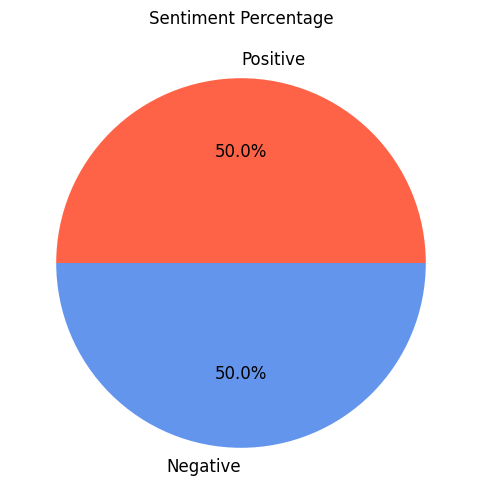

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

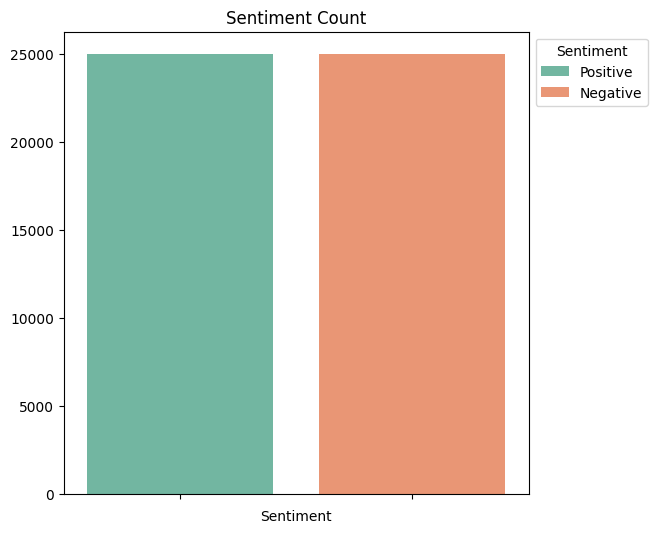

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

537072

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus["Review"].apply(lambda n:len(word_tokenize(n)))
Corpus["Number of Words 1"].sum()

13974174

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords

279

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords

2911

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords

8

# Number Of Charachters Before Text Normalization

In [16]:
Corpus["Number of Charachters 1"] = Corpus["Review"].str.len()
Corpus["Number of Charachters 1"].sum()

65471551

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters

1309

# Maximum Number Of Charachters Before Text Normalization

In [18]:
MaximumNumberOfCharachters = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters

13704

# Minimum Number Of Charachters Before Text Normalization

In [19]:
MinimumNumberOfCharachters = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters

32

# Most Frequent Words Before Text Normalization

In [20]:
MostFrequentWord = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF

,Word,Count
1,the,568735
2,a,306960
3,and,301919
4,of,283625
5,to,261850
6,is,203056
7,in,169981
8,I,132498
9,that,126818
10,this,113726


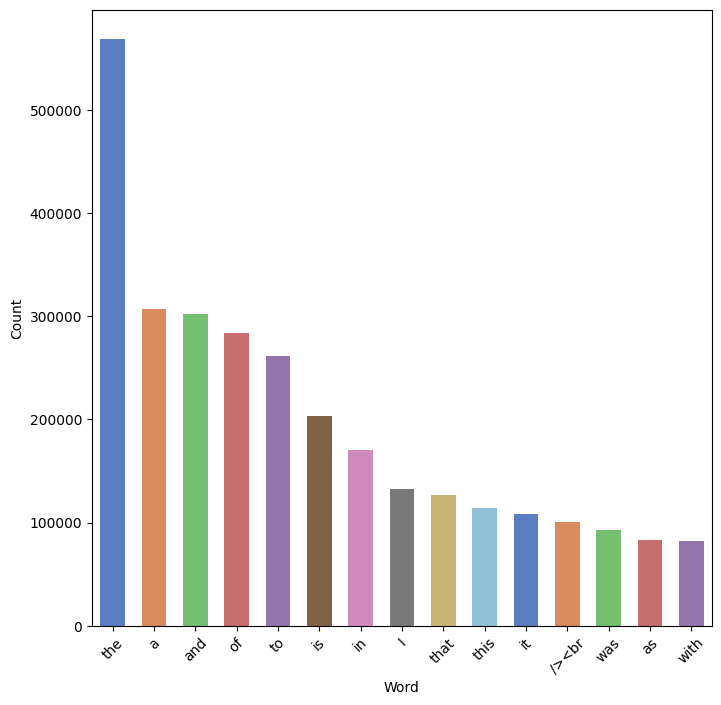

In [21]:
bar_plot(data=MostFrequentWordDF, x = 'Word', y='Count')

# Text Normalization

In [22]:
text_normalization = TextNormalization( string_lower = True,
                                        remove_emojis = True,
                                        remove_hashtags = True,
                                        remove_emails = True ,
                                        remove_url = True,
                                        remove_mention = True,
                                        remove_duplicate_char = True,
                                        remove_single_char = True,
                                        remove_special_character = True,
                                        remove_new_line_char = True,
                                        remove_number = True,
                                        remove_html_tags = True,
                                        remove_non_english = True,
                                        remove_whitespace = True,
                                        remove_unicode_characters = True,
                                        remove_longest_than = True,
                                        remove_stop_words = True,
                                        lemmatizer = False,
                                        stemmer = True)

In [23]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))

In [24]:
Corpus.dropna(axis=1, inplace=True)

# Number Of Unique Words

In [25]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)
len(UniqueWords)

67448

# WordCloud

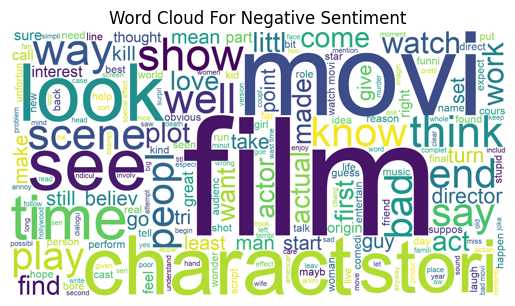

In [26]:
wordcloud(data=Corpus, target='Negative', width=1500, hieght=800, review='Normalized_Review')

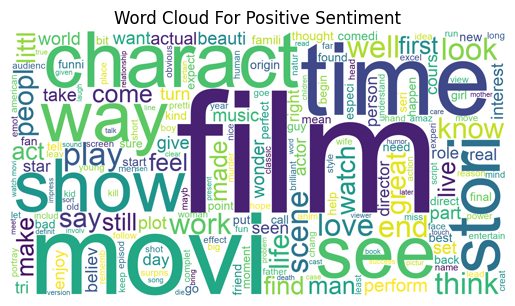

In [27]:
wordcloud(data=Corpus, target='Positive', width=1500, hieght=800, review='Normalized_Review')

# Number Of Words After Text Normalization

In [28]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

5129440

# Average Number Of Words After Text Normalization

In [29]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords

103

# Maximum Number Of Word After Text Normalization

In [30]:
MaximumNaumberOfWords = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords

1275

# Minimum Number Of Words After Text Normalization

In [31]:
MimimumNaumberOfWords = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords

3

# Number Of Charachters After Text Normalization

In [32]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters 2"].sum()

31614423

# Average Number Of Charachters After Text Normalization

In [33]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters

632

# Maximum Number Of Charachters After Text Normalization

In [34]:
MaximumNumberOfCharachters = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters

7590

# Minimum Number Of Charachters After Text Normalization

In [35]:
MinimumNumberOfCharachters = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters

17

# Most Frequent Words After Text Normalization

In [36]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,movi,103281
1,film,95884
2,like,45209
3,time,31967
4,charact,28364
5,see,28244
6,watch,27878
7,stori,25285
8,well,21794
9,scene,21452


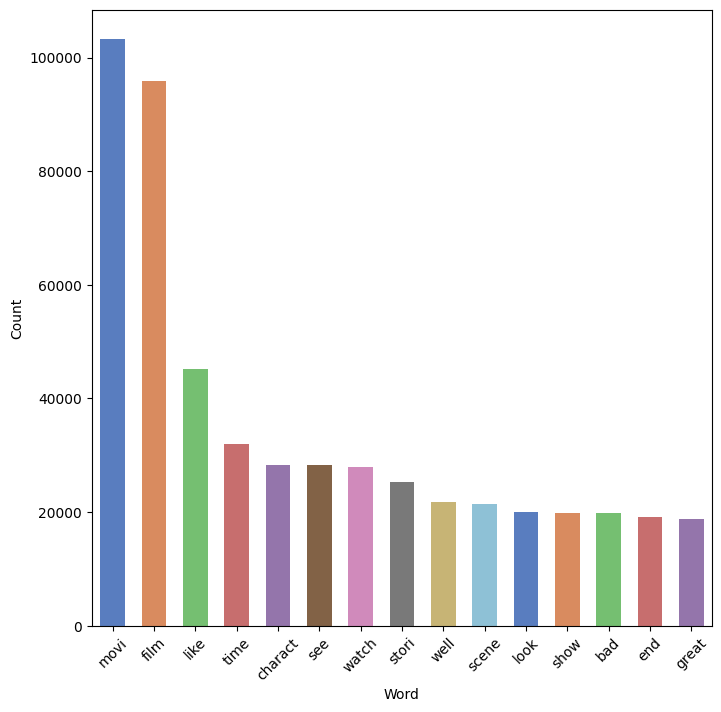

In [37]:
bar_plot(data=MostFrequentWordDF, x = 'Word', y='Count')

# Split The DataSet Into Independet (X) And Dependent (Y)

In [38]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Split The Dataset Into Training And Testing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Encoding Dependent Variables (Y) Into Numerical

In [40]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Vectorizer

In [41]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Index

In [42]:
Word_index = Vectorizer.vocabulary_
Word_index

{'review': 44738,
 'contain': 11115,
 'spoiler': 50608,
 'expect': 17537,
 'movi': 35898,
 'pull': 42746,
 'video': 58068,
 'store': 51446,
 'rack': 43275,
 'white': 59413,
 'nois': 37549,
 'first': 18771,
 'credit': 11847,
 'stupid': 51768,
 'run': 45881,
 'minut': 34907,
 'pace': 39269,
 'start': 51040,
 'finish': 18693,
 'sloow': 49469,
 'heroin': 24027,
 'like': 30988,
 'wear': 59017,
 'bra': 6498,
 'director': 14262,
 'enjoy': 16720,
 'jiggl': 27500,
 'effect': 16067,
 'anna': 1918,
 'paquin': 39588,
 'descend': 13670,
 'stair': 50896,
 'boobi': 6157,
 'low': 31722,
 'level': 30791,
 'buzz': 7598,
 'factor': 17763,
 'second': 47462,
 'nice': 37218,
 'rip': 45061,
 'element': 16295,
 'lovecraft': 31696,
 'horror': 24861,
 'genr': 20787,
 'mechan': 33872,
 'least': 30437,
 'ration': 43667,
 'consist': 11061,
 'irrat': 26741,
 'behavior': 4618,
 'stinker': 51338,
 'tri': 55261,
 'establish': 17146,
 'sens': 47689,
 'modern': 35255,
 'realiti': 43817,
 'situat': 49120,
 'call': 7834,


# Machine Learning

**1-Naive Bayes**

In [43]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

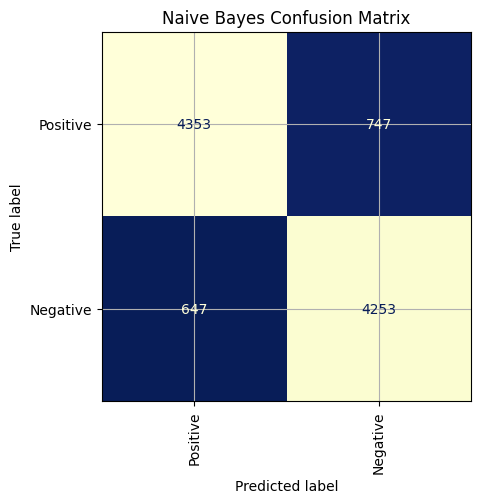

In [44]:
y_predNB = Naive_Bayes.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [45]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [46]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

FalseNegativeRateNB = false_negative_rate(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
FalsePositiveRateNB = false_positive_rate(False_Positive =False_PositiveNB,  True_Negative = True_NegativeNB)

In [47]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB, False_Negative_Rate = FalseNegativeRateNB, False_Positive_Rate = FalsePositiveRateNB)

,Values
Accuracy,0.860600
Precision,0.853529
Sensitivity,0.870600
Specificity,0.850600
F1Score,0.861980
Error,0.139400
False Negative Rate,0.129400
False Positive Rate,0.149400


**2-Logistic Regression**

In [48]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_Vec, y_train=y_train)


LogisticRegression()

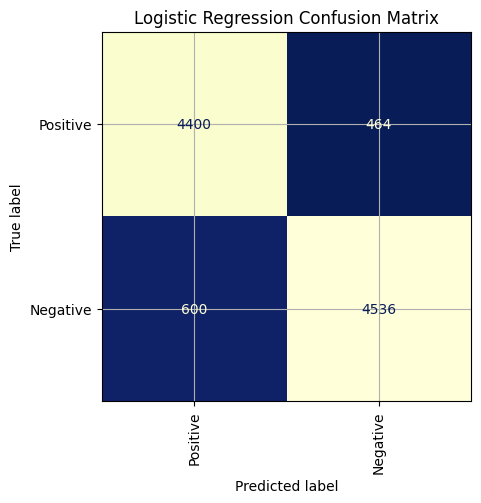

In [49]:
y_predLR = Logistic_Regression.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [50]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [51]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

FalseNegativeRateLR = false_negative_rate(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
FalsePositiveRateLR = false_positive_rate(False_Positive =False_PositiveLR,  True_Negative = True_NegativeLR)



In [52]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR, False_Negative_Rate = FalseNegativeRateLR, False_Positive_Rate = FalsePositiveRateLR)

,Values
Accuracy,0.893600
Precision,0.904605
Sensitivity,0.880000
Specificity,0.907200
F1Score,0.892133
Error,0.106400
False Negative Rate,0.120000
False Positive Rate,0.092800


**3-Decision Tree**

In [53]:
Algorithm = DecisionTreeClassifier(criterion='entropy')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier(criterion='entropy')

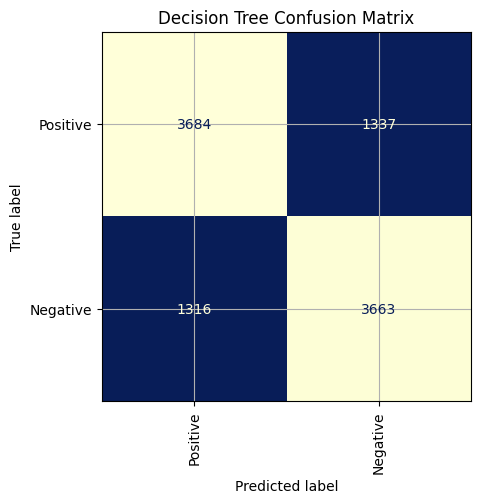

In [54]:
y_predDT = Decision_Tree.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [55]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [56]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

FalseNegativeRateDT = false_negative_rate(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
FalsePositiveRateDT = false_positive_rate(False_Positive =False_PositiveDT,  True_Negative = True_NegativeDT)

In [57]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT, False_Negative_Rate = FalseNegativeRateDT, False_Positive_Rate = FalsePositiveRateDT)

,Values
Accuracy,0.734700
Precision,0.733718
Sensitivity,0.736800
Specificity,0.732600
F1Score,0.735256
Error,0.265300
False Negative Rate,0.263200
False Positive Rate,0.267400


**4-K Nearest Neighbors**

In [58]:
Algorithm =KNeighborsClassifier(metric='cosine', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(metric='cosine')

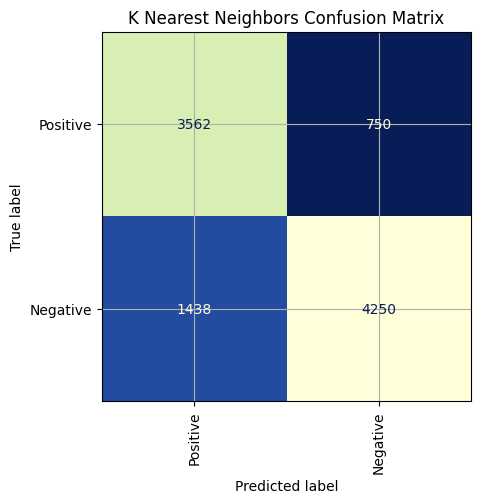

In [59]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [60]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [61]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

FalseNegativeRateKNN = false_negative_rate(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
FalsePositiveRateKNN = false_positive_rate(False_Positive =False_PositiveKNN,  True_Negative = True_NegativeKNN)

In [62]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN, False_Negative_Rate = FalseNegativeRateKNN, False_Positive_Rate = FalsePositiveRateKNN)

,Values
Accuracy,0.781200
Precision,0.826067
Sensitivity,0.712400
Specificity,0.850000
F1Score,0.765034
Error,0.218800
False Negative Rate,0.287600
False Positive Rate,0.150000


**5-Random Forest**

In [63]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=300)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

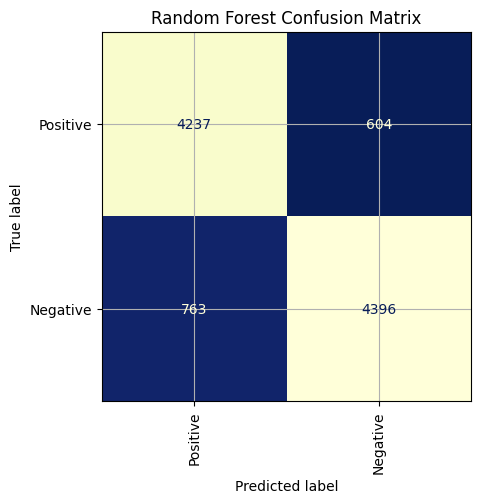

In [64]:
y_predRF = Random_Forest.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [65]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [66]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

FalseNegativeRateRF = false_negative_rate(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
FalsePositiveRateRF = false_positive_rate(False_Positive =False_PositiveRF,  True_Negative = True_NegativeRF)

In [67]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF, False_Negative_Rate = FalseNegativeRateRF, False_Positive_Rate = FalsePositiveRateRF)

,Values
Accuracy,0.863300
Precision,0.875232
Sensitivity,0.847400
Specificity,0.879200
F1Score,0.861091
Error,0.136700
False Negative Rate,0.152600
False Positive Rate,0.120800


**6-SGD Classifier**

In [68]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

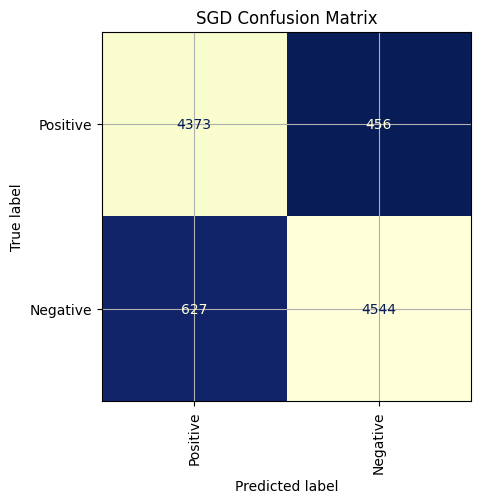

In [69]:
y_predSGD = SGD.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [70]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [71]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

FalseNegativeRateSGD = false_negative_rate(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
FalsePositiveRateSGD = false_positive_rate(False_Positive =False_PositiveSGD,  True_Negative = True_NegativeSGD)

In [72]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD, False_Negative_Rate = FalseNegativeRateSGD, False_Positive_Rate = FalsePositiveRateSGD)

,Values
Accuracy,0.891700
Precision,0.905571
Sensitivity,0.874600
Specificity,0.908800
F1Score,0.889816
Error,0.108300
False Negative Rate,0.125400
False Positive Rate,0.091200


# Build Word2Vec

In [73]:
# word_2_vec_(data = Data['Text'], vector_size=100, sg = 1, name = 'EnglishWord2Vec100D')

# Deep Learning

In [74]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')
embedding_dim = 100

In [75]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 61349

The Max Length Is : 1275


In [76]:
English_Word_2_Vec_100D = './EnglishWord2Vec100D.txt'
embedding_dic = {}
with open(English_Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [77]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [78]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)

**7-LSTM**

Epoch 1/20
1250/1250 [==============================] - 172s 135ms/step - loss: 0.4743 - accuracy: 0.7918 - val_loss: 0.4066 - val_accuracy: 0.8321
Epoch 2/20
1250/1250 [==============================] - 169s 135ms/step - loss: 0.4135 - accuracy: 0.8240 - val_loss: 0.4802 - val_accuracy: 0.7782
Epoch 3/20
1250/1250 [==============================] - 169s 135ms/step - loss: 0.3766 - accuracy: 0.8383 - val_loss: 0.3398 - val_accuracy: 0.8512
Epoch 4/20
1250/1250 [==============================] - 170s 136ms/step - loss: 0.3557 - accuracy: 0.8486 - val_loss: 0.3605 - val_accuracy: 0.8534
Epoch 5/20
1250/1250 [==============================] - 168s 135ms/step - loss: 0.3379 - accuracy: 0.8573 - val_loss: 0.3270 - val_accuracy: 0.8559
Epoch 6/20
1250/1250 [==============================] - 167s 134ms/step - loss: 0.3237 - accuracy: 0.8630 - val_loss: 0.3098 - val_accuracy: 0.8716
Epoch 7/20
1250/1250 [==============================] - 166s 133ms/step - loss: 0.3093 - accuracy: 0.8698 - val_

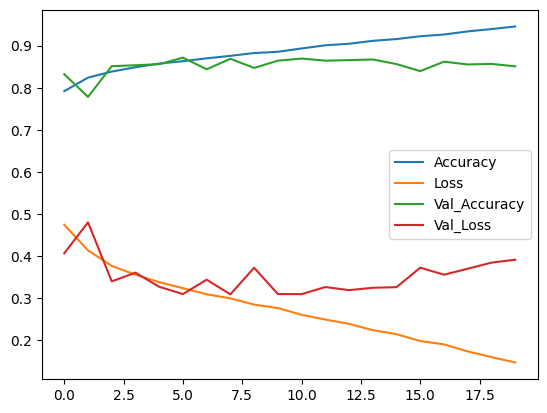

 
The Evaluation Of Training Is 0.1239 For Loss And 0.9596 For Accuracy
 
The Evaluation Of Testing Is 0.3913 For Loss And 0.8508 For Accuracy


In [79]:
with tf.device('gpu'):
    LSTM_ =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout1=0.3, dropout2=0.3, units1=64, units2 =32, units3 = 32, embeddings_matrix = embedding_matrix)
    model_compile(model=LSTM_)
    history = model_fit(model=LSTM_, X_train=encoded_X_train, y_train=y_train, epochs=20, X_test=encoded_X_test, y_test=y_test, batch_size=32, stop=early_stopping)
    plot_changes(histoty=history)
    deep_learning_evaluate_(model=LSTM_, x=encoded_X_train, y=y_train, train_test='Training')
    deep_learning_evaluate_(model=LSTM_, x=encoded_X_test,y= y_test, train_test='Testing')

**8-GRU**

Epoch 1/25
1250/1250 [==============================] - 162s 128ms/step - loss: 0.4786 - accuracy: 0.7880 - val_loss: 0.3905 - val_accuracy: 0.8353
Epoch 2/25
1250/1250 [==============================] - 161s 128ms/step - loss: 0.3842 - accuracy: 0.8385 - val_loss: 0.3557 - val_accuracy: 0.8484
Epoch 3/25
1250/1250 [==============================] - 155s 124ms/step - loss: 0.3559 - accuracy: 0.8496 - val_loss: 0.3229 - val_accuracy: 0.8624
Epoch 4/25
1250/1250 [==============================] - 155s 124ms/step - loss: 0.3351 - accuracy: 0.8590 - val_loss: 0.3979 - val_accuracy: 0.8190
Epoch 5/25
1250/1250 [==============================] - 156s 125ms/step - loss: 0.3185 - accuracy: 0.8663 - val_loss: 0.3895 - val_accuracy: 0.8212
Epoch 6/25
1250/1250 [==============================] - 156s 125ms/step - loss: 0.3046 - accuracy: 0.8727 - val_loss: 0.3566 - val_accuracy: 0.8450
Epoch 7/25
1250/1250 [==============================] - 156s 125ms/step - loss: 0.2900 - accuracy: 0.8785 - val_

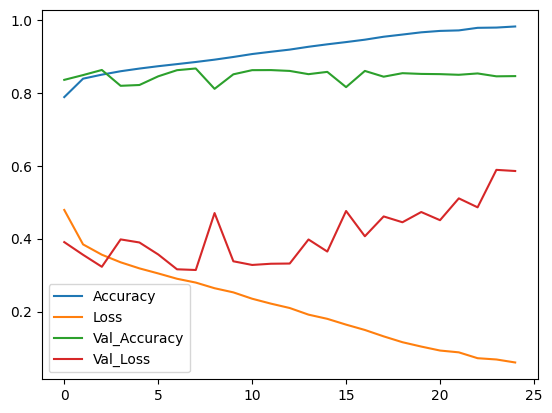

 
The Evaluation Of Training Is 0.0353 For Loss And 0.9927 For Accuracy
 
The Evaluation Of Testing Is 0.5854 For Loss And 0.8456 For Accuracy


In [80]:
with tf.device('gpu'):
    GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout1=0.2, dropout2=0.5, units1=64, units2 =32, units3 = 64, embeddings_matrix = embedding_matrix)   
    model_compile(model=GRU_)
    history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=25, X_test=encoded_X_test, y_test=y_test, batch_size=32, stop=early_stopping)
    plot_changes(histoty=history)
    deep_learning_evaluate_(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
    deep_learning_evaluate_(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')  

**9-Bidirectional LSTM** 

Epoch 1/25
1250/1250 [==============================] - 353s 277ms/step - loss: 0.4882 - accuracy: 0.7891 - val_loss: 0.3921 - val_accuracy: 0.8378
Epoch 2/25
1250/1250 [==============================] - 348s 279ms/step - loss: 0.4117 - accuracy: 0.8272 - val_loss: 0.4524 - val_accuracy: 0.7726
Epoch 3/25
1250/1250 [==============================] - 351s 280ms/step - loss: 0.3820 - accuracy: 0.8374 - val_loss: 0.3939 - val_accuracy: 0.8259
Epoch 4/25
1250/1250 [==============================] - 355s 284ms/step - loss: 0.3595 - accuracy: 0.8487 - val_loss: 0.4208 - val_accuracy: 0.7962
Epoch 5/25
1250/1250 [==============================] - 349s 279ms/step - loss: 0.3424 - accuracy: 0.8559 - val_loss: 0.3184 - val_accuracy: 0.8677
Epoch 6/25
1250/1250 [==============================] - 344s 275ms/step - loss: 0.3266 - accuracy: 0.8624 - val_loss: 0.3530 - val_accuracy: 0.8378
Epoch 7/25
1250/1250 [==============================] - 343s 274ms/step - loss: 0.3129 - accuracy: 0.8688 - val_

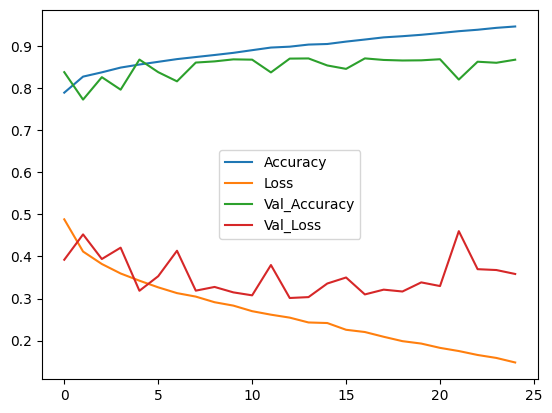

 
The Evaluation Of Training Is 0.1129 For Loss And 0.9664 For Accuracy
 
The Evaluation Of Testing Is 0.3584 For Loss And 0.8674 For Accuracy


In [83]:
with tf.device('gpu'):
    Bidirectional_LSTM=bidirectional_lstm(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout1=0.5, dropout2=0.5, units1=32, units2 =32, units3 = 32, embeddings_matrix = embedding_matrix)
    model_compile(model=Bidirectional_LSTM)
    history = model_fit(model=Bidirectional_LSTM, X_train=encoded_X_train, y_train=y_train, epochs=25, X_test=encoded_X_test, y_test=y_test, batch_size=32, stop=early_stopping)
    plot_changes(histoty=history) 
    deep_learning_evaluate_(model=Bidirectional_LSTM, x=encoded_X_train, y=y_train, train_test='Training')
    deep_learning_evaluate_(model=Bidirectional_LSTM, x=encoded_X_test,y= y_test, train_test='Testing')